In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sys
print(sys.version)

3.8.13 (default, Mar 16 2022, 17:28:59) 
[GCC 7.5.0]


In [35]:
dataframe = pd.read_pickle('/home/dominic/repos/norlab_WMRD/data/warthog_wheel/doughnut_datasets/depot_2/torch_dataset_all.pkl')
print(dataframe.columns)

Index(['init_icp_x', 'init_icp_y', 'init_icp_z', 'init_icp_roll',
       'init_icp_pitch', 'init_icp_yaw', 'calib_step', 'cmd_vx', 'cmd_omega',
       'encoder_vx',
       ...
       'cmd_left_wheel_38', 'cmd_right_wheel_38', 'cmd_left_wheel_39',
       'cmd_right_wheel_39', 'gt_icp_x', 'gt_icp_y', 'gt_icp_z', 'gt_icp_roll',
       'gt_icp_pitch', 'gt_icp_yaw'],
      dtype='object', length=102)


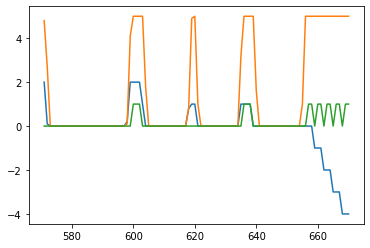

In [39]:
plt.plot(dataframe['cmd_omega'][-100:])
plt.plot(dataframe['cmd_vx'][-100:])
plt.plot(dataframe['steady_state_mask'][-100:])

In [37]:
def fetch_steady_state_data(data_string, dataframe, steady_state_array):
    data_array = dataframe[data_string].to_numpy()
    return data_array[steady_state_array == True]

steady_state_array = dataframe['steady_state_mask'].to_numpy()

cmd_vx_steady_state = fetch_steady_state_data('cmd_vx', dataframe, steady_state_array)
cmd_omega_steady_state = fetch_steady_state_data('cmd_omega', dataframe, steady_state_array)
print(cmd_vx_steady_state.shape)

encoder_vx_steady_state = fetch_steady_state_data('encoder_vx', dataframe, steady_state_array)
encoder_omega_steady_state = fetch_steady_state_data('encoder_omega', dataframe, steady_state_array)

icp_vx_steady_state = fetch_steady_state_data('icp_vx', dataframe, steady_state_array)
icp_omega_steady_state = fetch_steady_state_data('icp_omega', dataframe, steady_state_array)


(161,)


(-1.0, 6.0)

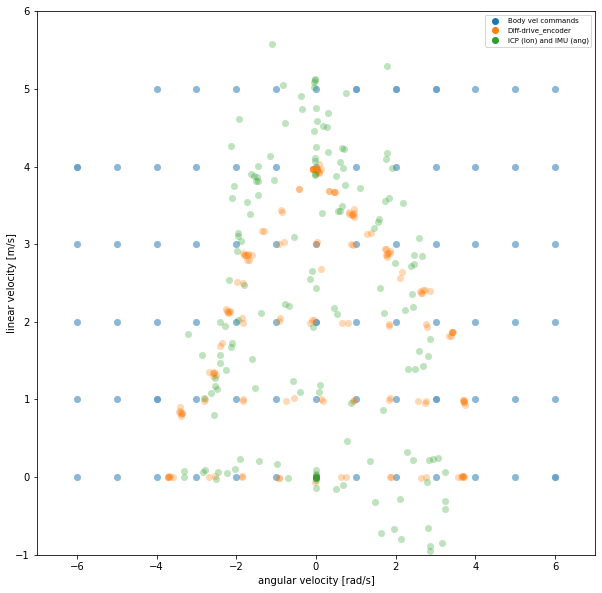

In [41]:
plt.figure(figsize=(10,10))
ax = plt.gca()
fig = plt.gcf()

# df_filtered = autorally_df[(autorally_df.linear_v < 25)] #Super weird ultra large values on linar velocity
# print("filtered {} data points".format(len(autorally_df)-len(df_filtered)))

# max_lv = max(np.abs(df_filtered['linear_v']))
# max_av = max(np.abs(df_filtered['angular_v']))


# meas = ax.scatter(df_filtered['angular_v']/(max_av/2.5), df_filtered['linear_v']/(max_lv/2.5), 
#                   c = 'tab:green', 
#                   cmap = 'hot', 
#                   alpha = 0.05, 
#                   lw=0, 
#                   s=5,
#                   label='Autorally encoders-based body velocities',
#                  rasterized=True)

alpha_plot = 0.3

cmd = ax.scatter(cmd_omega_steady_state, cmd_vx_steady_state, 
                  c = 'tab:blue', 
                  cmap = 'hot', 
                  alpha = alpha_plot, 
                  lw=0, 
                  s=50,
                  label='Body vel commands',
                 rasterized=True)

encoder = ax.scatter(encoder_omega_steady_state, encoder_vx_steady_state,
                  c = 'tab:orange', 
                  cmap = 'hot', 
                  alpha = alpha_plot, 
                  lw=0, 
                  s=50,
                  label='Diff-drive_encoder',
                 rasterized=True)

icp = ax.scatter(icp_omega_steady_state, icp_vx_steady_state,  
                  c = 'tab:green', 
                  cmap = 'hot', 
                  alpha = alpha_plot, 
                  lw=0, 
                  s=50,
                  label='ICP (lon) and IMU (ang)',
                 rasterized=True)

ax.set_ylabel('linear velocity [m/s]', labelpad=-2)
ax.set_xlabel('angular velocity [rad/s]')

leg = plt.legend(fontsize=7, loc='best')
for lh in leg.legendHandles: 
    lh.set_alpha(1)

ax.set_xlim(-7, 7)
ax.set_ylim(-1, 6.0)

# ax.set_xticks([-1,0,1])
# ax.set_yticks([-1,0,1])
# ax.set_xticklabels([r'$-\dot{\theta}_{max}$', '0', r'$\dot{\theta}_{max}$'])
# ax.set_yticklabels([r'$-v_{max}$', '0', r'$v_{max}$'])

# fig.subplots_adjust(left=.15, bottom=.17, right=.98, top=.98)
# fig.set_size_inches(width, height)

In [42]:
full_run_dataframe = pd.read_pickle('/media/dominic/462D-1EE8/rosbags/doughnut_calibs/warthog/depot_2/extracted_data/data.pkl')

print(full_run_dataframe)

                  ros_time joy_switch icp_index   calib_state cmd_left_vel  \
0                      0.0        0.0       0.0           0.0          0.0   
1                        0      False         0      data: ''          0.0   
2      1663007447986398007      False         0      data: ''          0.0   
3      1663007447986398007      False         0      data: ''          0.0   
4      1663007448036771006      False         0      data: ''          0.0   
...                    ...        ...       ...           ...          ...   
34782  1663009186936661537      False     17269  data: "idle"          0.0   
34783  1663009186987082101      False     17270  data: "idle"          0.0   
34784  1663009187038229345      False     17271  data: "idle"          0.0   
34785  1663009187087294873      False     17271  data: "idle"          0.0   
34786  1663009187138350066      False     17271  data: "idle"          0.0   

      meas_left_vel cmd_right_vel meas_right_vel cmd_vel_x cmd_

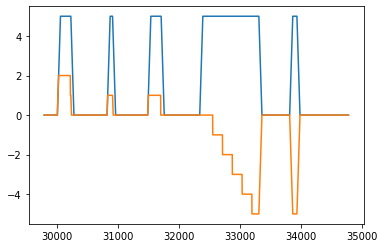

In [63]:
plt.plot(full_run_dataframe['cmd_vel_x'][-5000:])
plt.plot(full_run_dataframe['cmd_vel_omega'][-5000:])

(4999,)


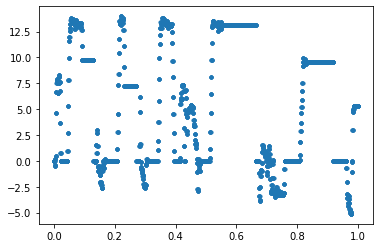

In [62]:
print(np.linspace(0,1, 4999).shape)

plt.scatter(np.linspace(0, 1, 5000), full_run_dataframe['meas_right_vel'][-5000:], s=10)
# plt.plot(full_run_dataframe['cmd_right_vel'][-5000:])